**PROBLEM STATEMENT**

Zomato has an Average of 17.5 million monthly transacting customers for its  food deliverly business. An average monthly active food deliverly restaurant partners on Zomato's Platform have also increased by 8.7% year on year, from 2,08,000 to 2,26,000. You are working in a data Driven role at Zomato. You have a dataset of customers. As a data professional, you need to analyse the data, perform EDA (Exploratory Data Analysis) and visualization, and answer the following questions.

**Questions we need to answer**

1. What type of restaurant do the majority of customers order from?

2. How many votes has each type of restaurant received from customers?

3. What are the ratings that the majority of restaurants have recieved?

4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

5. Which mode (online or offline) has recieved the maximum rating?

6. Which type of restaurant recieved more offline orders, so that Zomato can provide those customers with some good offers?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Zomato data .csv")

In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


**Data Cleaning ( useful for data centric work )**

Convert the data type of column - rate

In [ ]:
def HandleRate(value):
  value = str(value).split('/')
  value=value[0];
  return float(value)

df['rate']=df['rate'].apply(HandleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


##Type of Restaurant

Text(0.5, 0, 'Type of Restaurant')

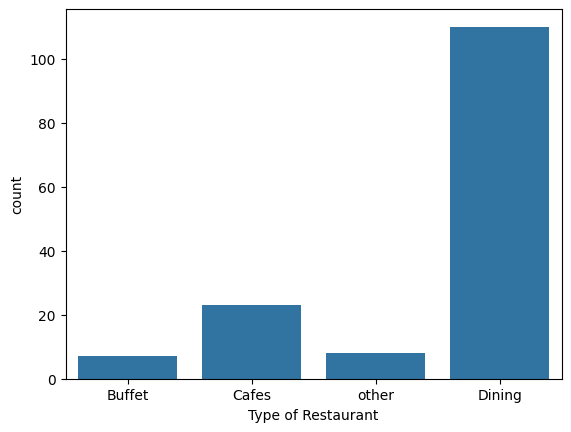

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

#Conclusion - Majority of the Restaurants fall under the dining category

Text(0, 0.5, 'Votes')

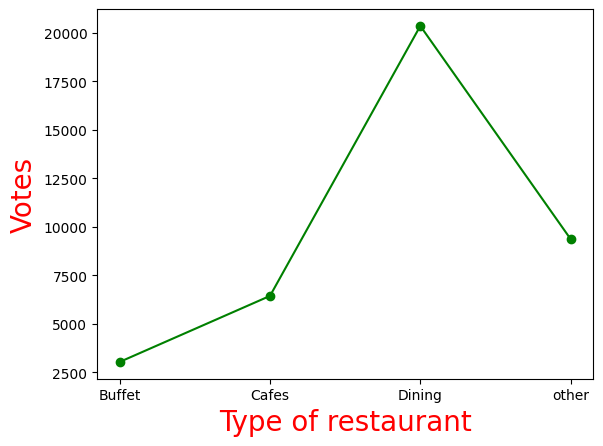

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

#Conclusion - Dining Restaurants has recieved maximum votes

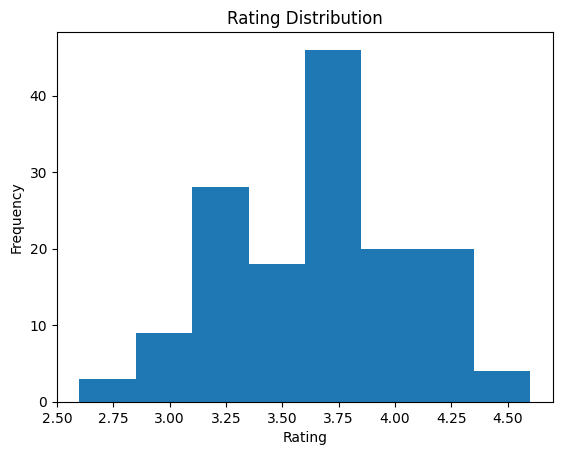

In [ ]:
plt.hist(df['rate'],bins =8)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

#Conclusion - Majority restaurants recieved ratings from 3.5 to 4

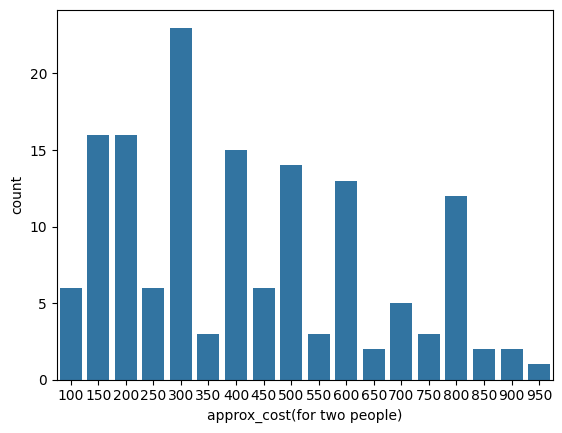

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.show()

# Conclusion - The majority of couples preferrestaurants with and approximate cost of 300 rupees

<Axes: xlabel='online_order', ylabel='rate'>

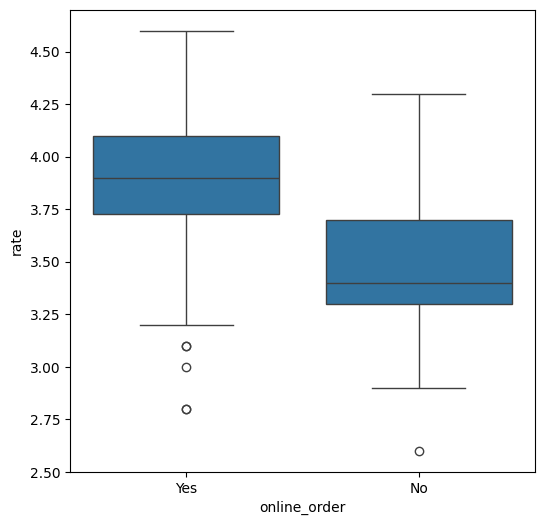

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data = df)

# Conclusion - Offline orders recieved lower ratings in comparison to online orders

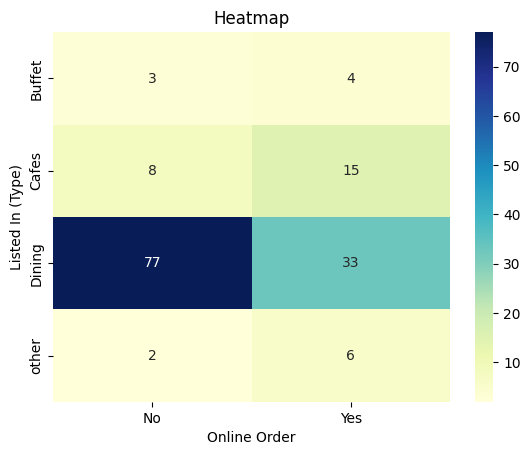

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', fill_value=0, aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily recieve online orders. This Suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.